In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib notebook

| Size (sqft)     | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|-------------- |  
| 2104            | 5                   | 1                | 45           | 460           |  
| 1416            | 3                   | 2                | 40           | 232           |  
| 852             | 2                   | 1                | 35           | 178           |  


In [2]:
X_train = np.array([[2104.0, 5, 1, 45], 
                    [1416, 3, 2, 40], 
                    [852, 2, 1, 35]])

y_train = np.array([460, 232, 178])
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
m = X_train.shape[0]
n = X_train.shape[1]

# Scaling poth (Size & age) of home features 
for i in range(m): 
    X_train[i][0] = X_train[i][0]/2104 
    #X_train[i][1] = X_train[i][1]/5
    #X_train[i][2] = X_train[i][2]/3
    X_train[i][3] = X_train[i][3]/45


In [3]:
"""
 x is a 2D (m,n) Matrix where x[i] is a is a feature vector 
 w is also 2D(1,n) Matrex 
 returns an array of y_hats (1,n)
 where n is number of input features for each training example 
 and m is the number of training examples 
"""
def modle (x,w,b):
    m = x.shape[0]
    f_wb = []
    for i in range(m):
        f_wb.append(np.dot(w,x[i]) + b) 
    return f_wb

In [4]:
def cost_with_regularization(x,y,w,b,lamda):
    m = x.shape[0]
    n = x.shape[1]
    f_wb = modle(x,w,b)
    loss = []
    reg  = []
    for i in range(m):
        loss.append((f_wb[i]-y[i])**2)
    for j in range(n):
        reg.append(w[j]**2)
    total_cost = sum(loss)/(2*m) + (lamda/(2*m))*sum(reg)
    return total_cost

# Computing the Gradient with regularization for linear regression

$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)}  +  \frac{\lambda}{m} w_j  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) 
\end{align*}$$

In [5]:
def gradent_with_regularization(x,y,w,b,lamda):
    m = x.shape[0]
    n = x.shape[1]
    f_wb = modle(x,w,b)
    dj_dw = []
    dj_db = []
    for j in range(n):
        loss = []
        for i in range(m):
            loss.append((f_wb[i]-y[i])*x[i][j])
        dj_dw.append((sum(loss)+(lamda*w[j]))/m)
        
    for i in range(m):
        dj_db.append(f_wb[i]-y[i])
    return dj_dw , sum(dj_db)/m

In [6]:
def gradent_descent(x,y,w,b,alpha,num_iters,lamda):
    n = x.shape[1]
    iter_num_i = np.array(np.arange(0,num_iters,1))
    cost_of_iter_num_i = []
    for i in range(num_iters):
        dj_dw ,dj_db = gradent_with_regularization(x,y,w,b,lamda)
        w = w - alpha * np.array(dj_dw)
        b = b - alpha * dj_db
        # calculating cost after each iteration 
        cost_of_iter_num_i.append(cost_with_regularization(x,y,w,b,lamda))
        if i%100 ==0:
            print ("iter {}: w = {} & b = {} ========>  Cost:  {}".format(i,w,b,cost_with_regularization(x,y,w,b,lamda)))
    return w, b , iter_num_i ,cost_of_iter_num_i

In [19]:
w, b , iter_num_i ,cost_of_iter_num_i = gradent_descent(X_train,y_train,w_init,b_init,0.1,1700,0.00000000000000000000001)

iter 0: w = [ -29.39071694 -123.85192545 -115.67684663  -66.7494336 ] & b = 738.847932890831 ========>  Cost:  58917.46385807751
iter 100: w = [  18.18680851   62.19152118 -176.31369287 -198.87695428] & b = 496.4171137995058 ========>  Cost:  3112.193363985323
iter 200: w = [  33.22256205   82.2631981  -115.07725528 -260.53933591] & b = 386.0256078359781 ========>  Cost:  1029.3766097372984
iter 300: w = [  41.84511432   93.55951458  -79.35793189 -295.89938855] & b = 322.7110217454903 ========>  Cost:  340.5038840560516
iter 400: w = [  46.80417649  100.05533733  -58.81199439 -316.2359009 ] & b = 286.29705820836404 ========>  Cost:  112.63408809920374
iter 500: w = [  49.65633305  103.79134225  -46.99518463 -327.93224888] & b = 265.3539197702997 ========>  Cost:  37.25783580153176
iter 600: w = [  51.29672356  105.94006965  -40.19885968 -334.65929133] & b = 253.30867439680765 ========>  Cost:  12.324389108484183
iter 700: w = [  52.24017844  107.17588963  -36.2900185  -338.52828534] & 

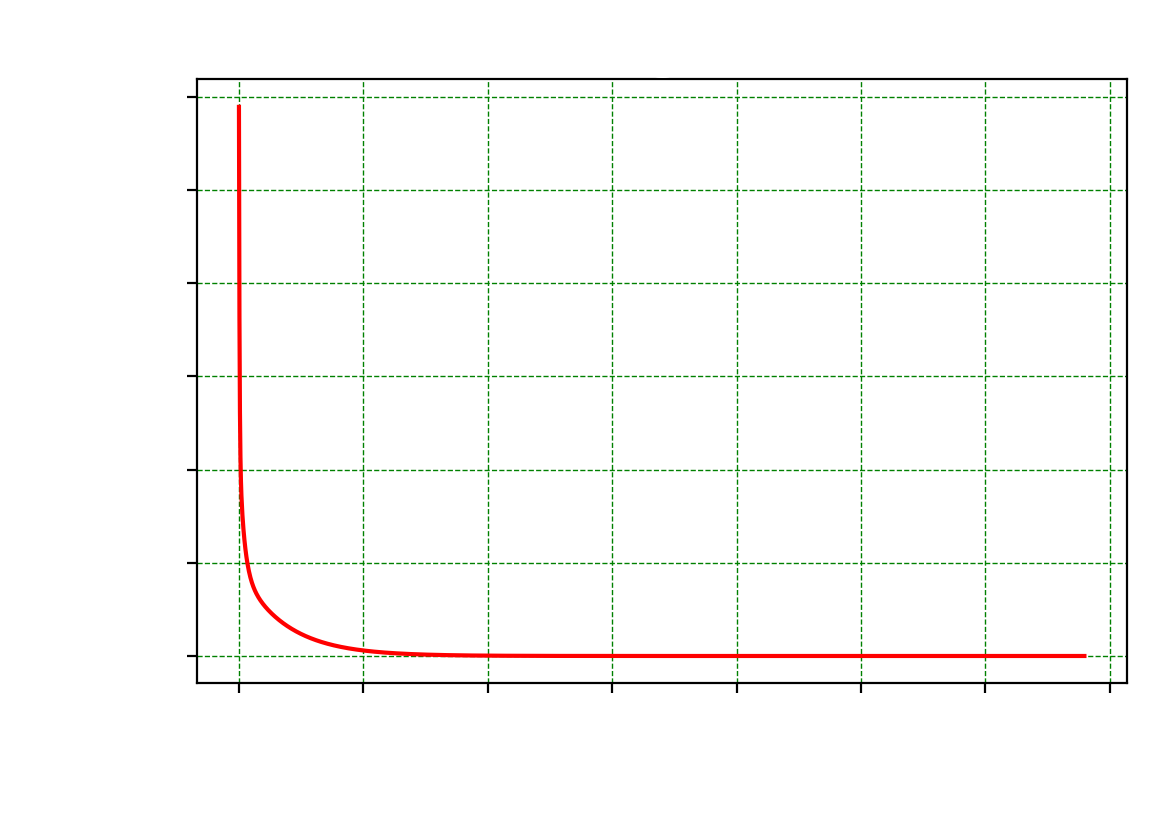

In [20]:
plt.figure(dpi = 200)
plt.plot(iter_num_i,cost_of_iter_num_i,c = 'r')

plt.title("Learning Curve ",fontdict={"fontname":'comic sans ms',"fontsize":20},color= "w")
plt.xlabel('num_iterations',fontdict={"fontname":'comic sans ms',"fontsize":20},color= "w")
plt.ylabel('Cost',fontdict={"fontname":'comic sans ms',"fontsize":20},c = 'w')
plt.xticks(c = "w")
plt.yticks(c = "w")
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()

In [21]:
predection = modle(X_train,w,b)
actual_error = y_train - np.array(predection)
abs_error = [np.abs(i) for i in actual_error]
for i in range(len(predection)):
    print("the actual value of example {}: {}   ===> the predected value: {} the absulte error:{} ".format(i+1,y_train[i],predection[i],abs_error[i]))

the actual value of example 1: 460   ===> the predected value: 459.9987347612589 the absulte error:0.0012652387410980737 
the actual value of example 2: 232   ===> the predected value: 231.99033243324277 the absulte error:0.009667566757229906 
the actual value of example 3: 178   ===> the predected value: 178.017113193424 the absulte error:0.0171131934239952 
